In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

## Temporal Series - Daily Cases (new and accumulated)

In [2]:
df_cases = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_cases.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_cases = df_cases.groupby(['Country/Region']).sum()
df_cases = df_cases.transpose()
df_cases.index.name = 'date'
df_cases.index = pd.to_datetime(df_cases.index)
df_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2021-06-16,93288,132476,134458,13836,37094,1263,4198620,223904,30301,649002,...,4605805,346515,104463,4,255457,11794,312164,6867,118850,40556
2021-06-17,96531,132481,134840,13839,37289,1263,4222400,224000,30309,649181,...,4616628,348662,104834,4,256862,12150,312334,6869,122244,40927
2021-06-18,98734,132484,135219,13842,37467,1263,4242763,224086,30322,649309,...,4626915,351378,105219,4,258140,12508,312499,6875,125157,41335
2021-06-19,98734,132488,135586,13842,37604,1263,4258394,224167,30331,649445,...,4636991,353377,105610,4,259413,12978,312605,6877,126973,41628
2021-06-20,98734,132490,135821,13842,37678,1263,4268789,224227,30355,649576,...,4646068,354865,106025,4,260740,13258,312673,6885,129033,41779


In [3]:
df_daily_cases = df_cases.sub(df_cases.shift())
df_daily_cases.iloc[0] = df_cases.iloc[0]
df_daily_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2021-06-16,16.0,7.0,343.0,8.0,173.0,0.0,25878.0,99.0,15.0,153.0,...,8811.0,2900.0,350.0,0.0,1341.0,490.0,216.0,3.0,3026.0,238.0
2021-06-17,3243.0,5.0,382.0,3.0,195.0,0.0,23780.0,96.0,8.0,179.0,...,10823.0,2147.0,371.0,0.0,1405.0,356.0,170.0,2.0,3394.0,371.0
2021-06-18,2203.0,3.0,379.0,3.0,178.0,0.0,20363.0,86.0,13.0,128.0,...,10287.0,2716.0,385.0,0.0,1278.0,358.0,165.0,6.0,2913.0,408.0
2021-06-19,0.0,4.0,367.0,0.0,137.0,0.0,15631.0,81.0,9.0,136.0,...,10076.0,1999.0,391.0,0.0,1273.0,470.0,106.0,2.0,1816.0,293.0
2021-06-20,0.0,2.0,235.0,0.0,74.0,0.0,10395.0,60.0,24.0,131.0,...,9077.0,1488.0,415.0,0.0,1327.0,280.0,68.0,8.0,2060.0,151.0


#### Countries with the biggest numbers of cases in the last day

In [4]:
df_daily_cases.tail().iloc[-1].nlargest(20)

Country/Region
India             53449.0
Brazil            44178.0
Colombia          27818.0
Russia            17367.0
Indonesia         13737.0
South Africa      13155.0
Argentina         10395.0
United Kingdom     9077.0
Iran               8161.0
Philippines        5795.0
Chile              5743.0
Mexico             5542.0
Oman               5320.0
Malaysia           5293.0
Turkey             5091.0
Iraq               4160.0
US                 3892.0
Thailand           3682.0
Bangladesh         3641.0
Peru               3550.0
Name: 2021-06-20 00:00:00, dtype: float64

In [5]:
countries_observed = ["US", 
                      "Brazil", 
                      "Austria", 
                      "Spain",
                      "France",
                      #"Portugal",
                      "Russia",
                      #"China",
                      "India",
                      "Italy",
                     ]

### New Cases (moving average, 7 days)

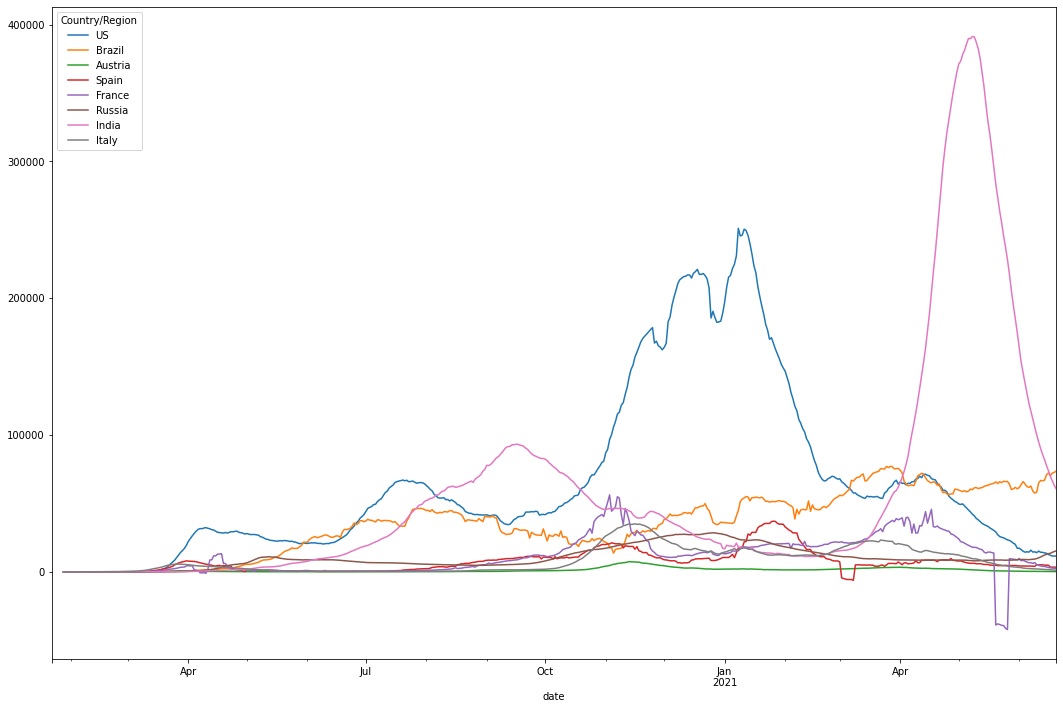

In [6]:
df_daily_cases[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Cases (log)

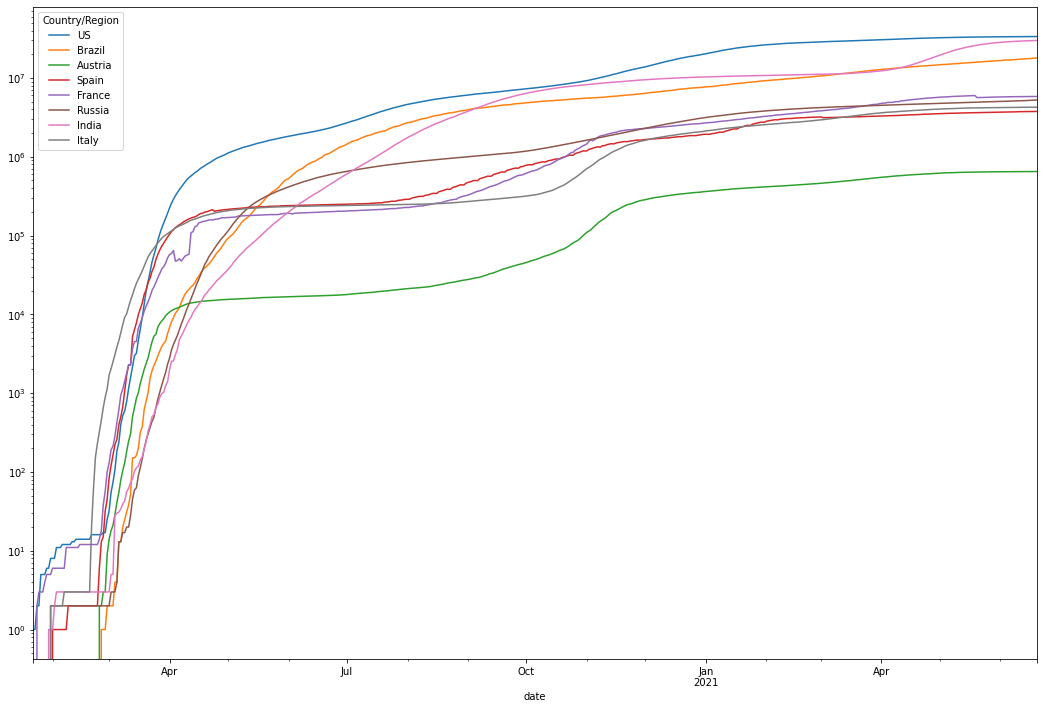

In [7]:
df_cases[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Deaths (new and accumulated)

In [8]:
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_deaths.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_deaths = df_deaths.groupby(['Country/Region']).sum()
df_deaths = df_deaths.transpose()
df_deaths.index.name = 'date'
df_deaths.index = pd.to_datetime(df_deaths.index)
df_deaths.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2021-06-16,3683,2454,3598,127,847,42,87261,4490,910,10671,...,128190,5120,711,1,2886,61,3544,1351,1492,1640
2021-06-17,3842,2454,3605,127,851,42,87789,4491,910,10674,...,128209,5152,713,1,2906,61,3545,1351,1525,1647
2021-06-18,3934,2454,3615,127,853,42,88247,4492,910,10677,...,128220,5207,717,1,2925,62,3548,1352,1554,1656
2021-06-19,3934,2454,3624,127,856,42,88742,4496,910,10679,...,128234,5241,718,1,2943,64,3550,1353,1595,1666
2021-06-20,3934,2454,3631,127,859,42,89043,4498,910,10680,...,128240,5271,718,1,2958,66,3551,1355,1644,1672


#### Countries with the biggest numbers of deaths in the last day

In [9]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths.tail().iloc[-1].nlargest(15)

Country/Region
India           1427.0
Brazil          1025.0
Colombia         599.0
Russia           445.0
Indonesia        371.0
Argentina        301.0
Peru             269.0
Mexico           228.0
Chile            121.0
Paraguay         112.0
South Africa     112.0
Iran             111.0
Oman              84.0
Philippines       83.0
US                83.0
Name: 2021-06-20 00:00:00, dtype: float64

#### Countries with the biggest numbers of deaths

In [10]:
df_deaths.tail().iloc[-1].nlargest(15)

Country/Region
US                601824
Brazil            501825
India             388135
Mexico            231187
Peru              190202
United Kingdom    128240
Italy             127270
Russia            127206
France            110900
Colombia           99934
Germany            90400
Argentina          89043
Iran               82965
Spain              80652
Poland             74828
Name: 2021-06-20 00:00:00, dtype: int64

In [11]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths[countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2021-06-16,368.0,2997.0,3.0,36.0,48.0,388.0,2330.0,52.0
2021-06-17,281.0,2311.0,3.0,19.0,56.0,410.0,1587.0,37.0
2021-06-18,637.0,2495.0,3.0,18.0,68.0,447.0,1647.0,35.0
2021-06-19,170.0,2301.0,2.0,0.0,22.0,461.0,1571.0,28.0
2021-06-20,83.0,1025.0,1.0,0.0,14.0,445.0,1427.0,17.0


### New Deaths (moving average, 7 days)

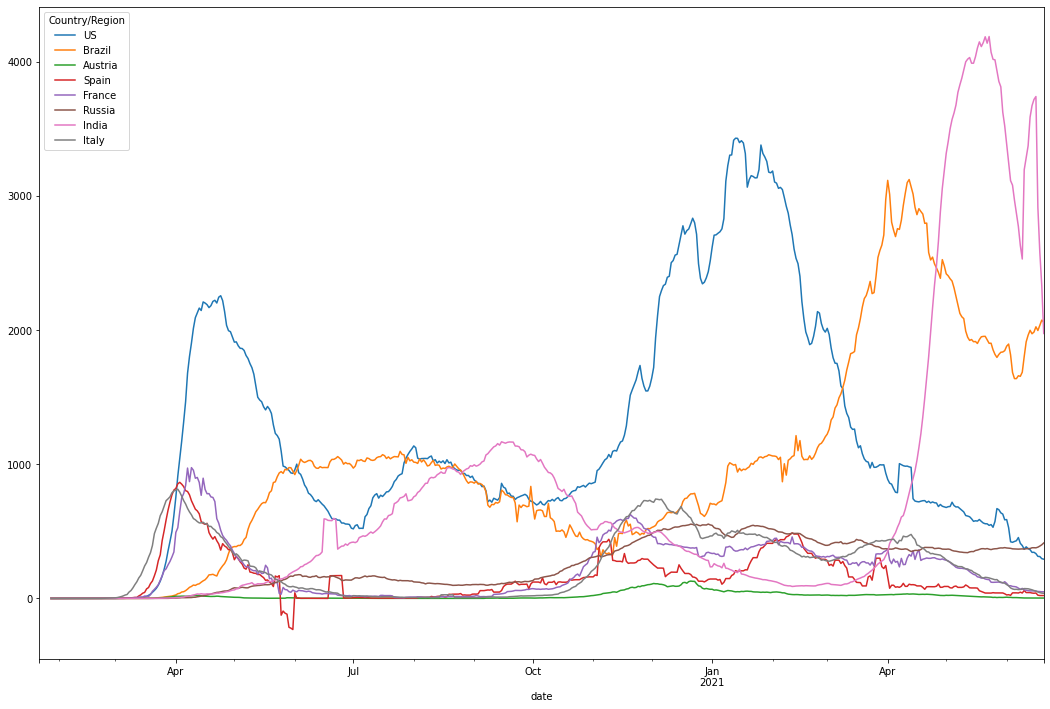

In [12]:
df_daily_deaths[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Deaths (log)

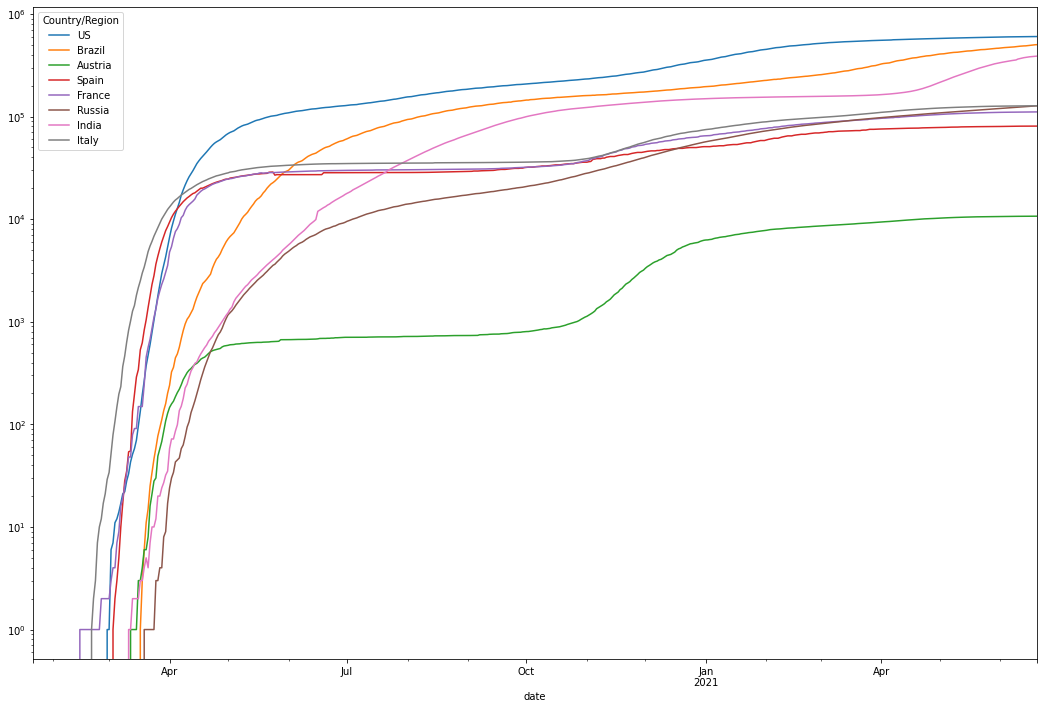

In [13]:
df_deaths[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered (new and accumulated)

In [14]:
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recovered.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.transpose()
df_recovered.index.name = 'date'
df_recovered.index = pd.to_datetime(df_recovered.index)

# fixing error in the original series
df_recovered.loc["2020-03-17","Austria"] = 8 
df_recovered.loc["2020-02-23","Italy"] = 1

df_recovered.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_daily_recovered = df_recovered.sub(df_recovered.shift())
df_daily_recovered.iloc[0] = df_recovered.iloc[0]
df_daily_recovered[df_daily_recovered >= 0][countries_observed].tail()

Country/Region,US,Brazil,Austria,Spain,France,Russia,India,Italy
date,,,,,,,,
2021-06-16,0.0,49601.0,461.0,0.0,536.0,9992.0,103570.0,5399.0
2021-06-17,0.0,91058.0,292.0,0.0,568.0,11087.0,88977.0,4533.0
2021-06-18,0.0,26575.0,352.0,0.0,472.0,10774.0,97743.0,7648.0
2021-06-19,0.0,58274.0,342.0,0.0,263.0,10507.0,87348.0,4087.0
2021-06-20,0.0,0.0,239.0,0.0,49.0,8533.0,78461.0,2304.0


### New Recovered (moving average, 7 days)

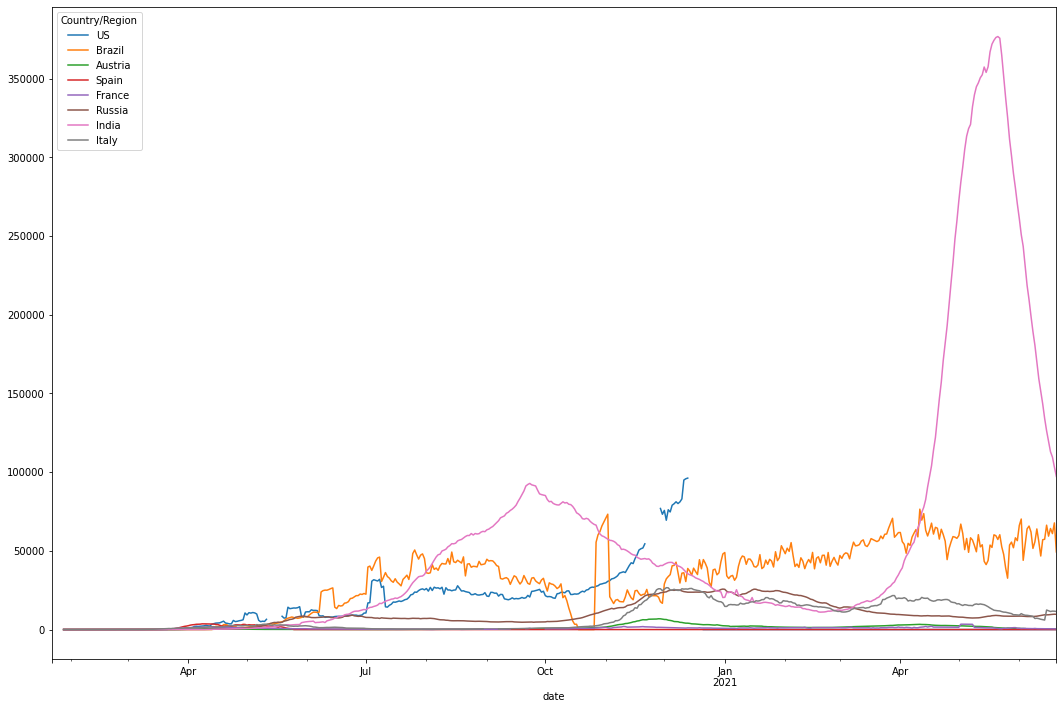

In [16]:
df_daily_recovered[df_daily_recovered >= 0][countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Recovered (log)

In [17]:
df_recovered.loc["2020-02-23","Italy"] = 1

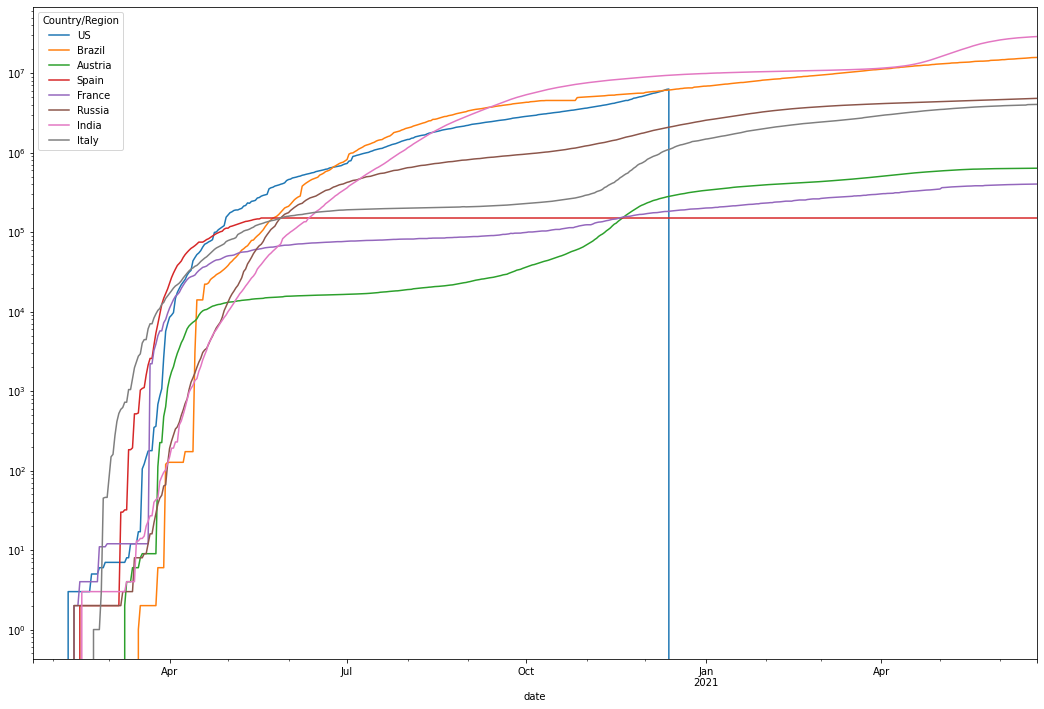

In [18]:
df_recovered[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

### Retrieving population data to explore COVID-19 data per inhabitant

In [19]:
## https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

#import requests
#import lxml.html as lh
#url = 'https://www.worldometers.info/world-population/population-by-country/'

In [20]:
##Create a handle, page, to handle the contents of the website
#page = requests.get(url) #Store the contents of the website under doc
#doc = lh.fromstring(page.content) #Parse data that are stored between <tr>..</tr> of HTML

In [21]:
##Check the length of the first 12 rows
#tr_elements = doc.xpath('//tr')
#[len(T) for T in tr_elements[:12]]

In [22]:
#tr_elements = doc.xpath('//tr') #Create empty list
#col = []
#i = 0 #For each row, store each first element (header) and an empty list
#for t in tr_elements[0]:
#    i += 1
#    name = t.text_content()
#    print('%d:"%s"'%(i,name))
#    col.append((name,[]))

In [23]:
##Since out first row is the header, data is stored on the second row onwards
#for j in range(1,len(tr_elements)):
#    #T is our j'th row
#    T = tr_elements[j]
#    #If row is not of same size, the //tr data is not from our table 
#    if len(T) != len(tr_elements[0]):
#        break
#    
#    #i is the index of our column
#    i = 0
#    
#    #Iterate through each element of the row
#    for t in T.iterchildren():
#        data = t.text_content() 
#        #Check if row is empty
#        if i > 0:
#        #Convert any numerical value to integers
#            try:
#                data = int(data)
#            except:
#                pass
#        #Append the data to the empty list of the i'th column
#        col[i][1].append(data)
#        #Increment i for the next column
#        i += 1

In [24]:
##Check the length of the columns
#[len(C) for (title,C) in col]

In [25]:
#wp_dict = {title:column for (title,column) in col}
#df_wp = pd.DataFrame(wp_dict)
#df_wp["Population (2020)"] = df_wp["Population (2020)"].str.replace(',', '').astype(float)

In [26]:
#with open("./df_wp.pkl", "wb") as f:
#    pickle.dump(df_wp, f)

In [27]:
with open("./df_wp.pkl", "rb") as f:
    df_wp = pickle.load(f)

In [28]:
df_wp.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1.439324e+09,0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,1.380004e+09,0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,3.310027e+08,0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,2.735236e+08,1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,2.208923e+08,2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [29]:
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    object 
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        234 non-null    float64
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    object 
 5   Density (P/Km²)          235 non-null    object 
 6   Land Area (Km²)          235 non-null    object 
 7   Migrants (net)           235 non-null    object 
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(1), object(11)
memory usage: 22.2+ KB


In [30]:
# Aligninig names of countries (e.g US and United States)
df_wp.loc[2, 'Country (or dependency)'] = 'US'
cop = df_wp.loc[df_wp["Country (or dependency)"].isin(countries_observed)][["Country (or dependency)",
                                                                            "Population (2020)"]]
cop

,Country (or dependency),Population (2020)
1,India,1.380004e+09
2,US,3.310027e+08
5,Brazil,2.125594e+08
8,Russia,1.459345e+08
21,France,6.527351e+07
22,Italy,6.046183e+07
29,Spain,4.675478e+07
96,Austria,9.006398e+06


In [31]:
pops = []
for country in countries_observed:
    p = cop[cop['Country (or dependency)'] == country]['Population (2020)'].values[0]
    pops.append(p)

## Temporal Series - Cumulative Cases per Population

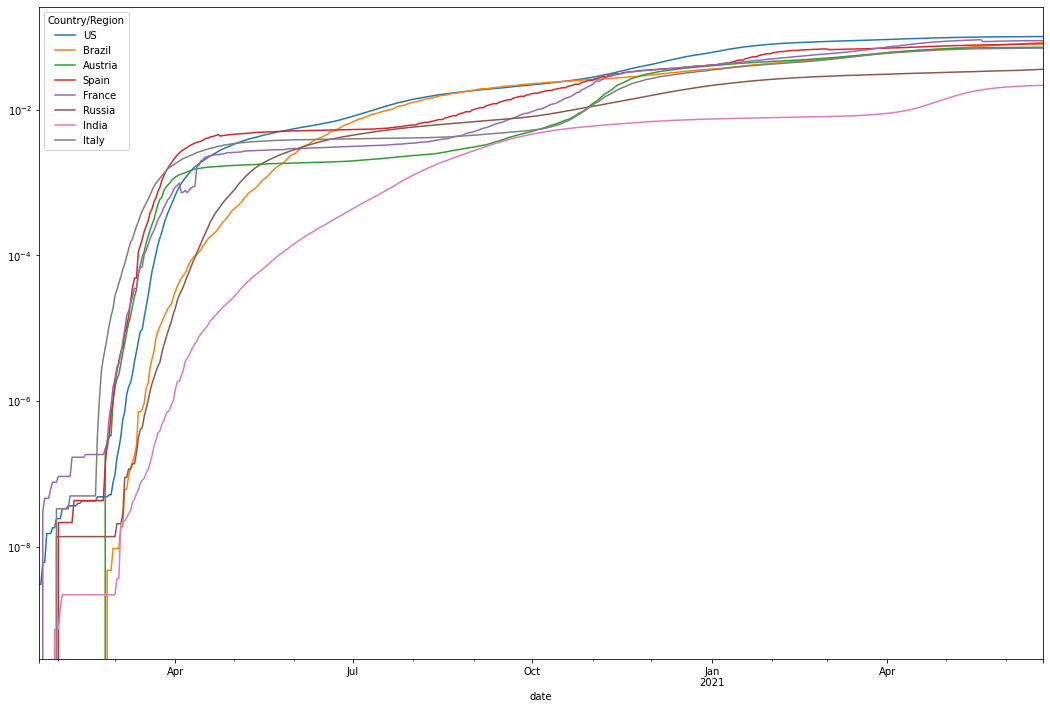

In [32]:
df_cases[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Cumulative Deaths per Population

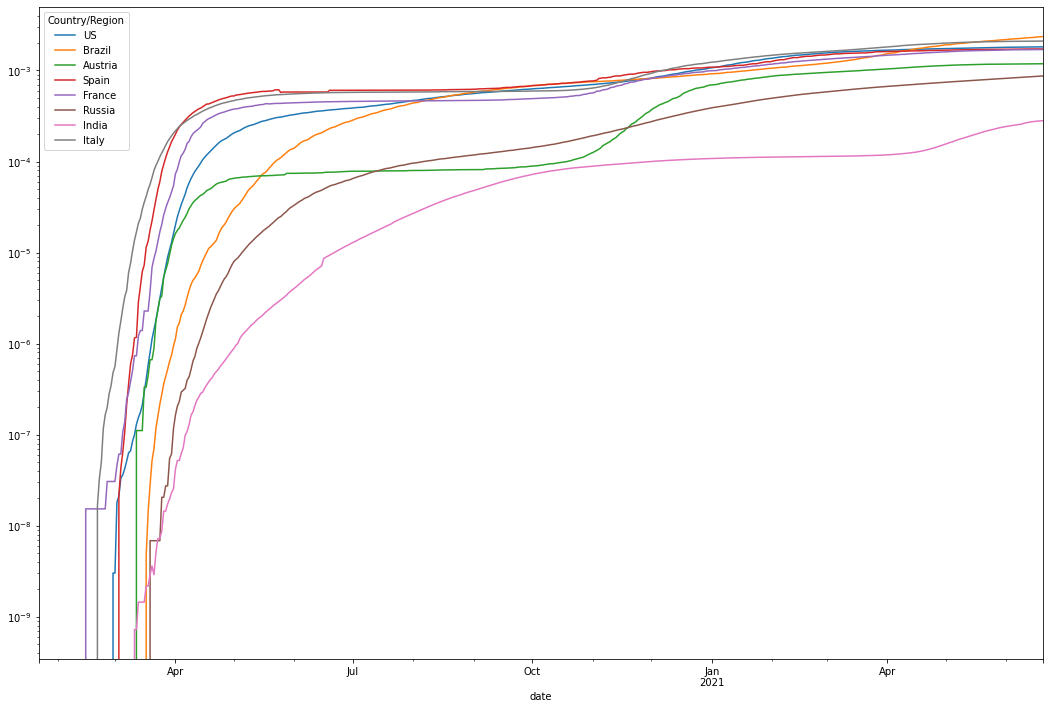

In [33]:
df_deaths[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered per Population

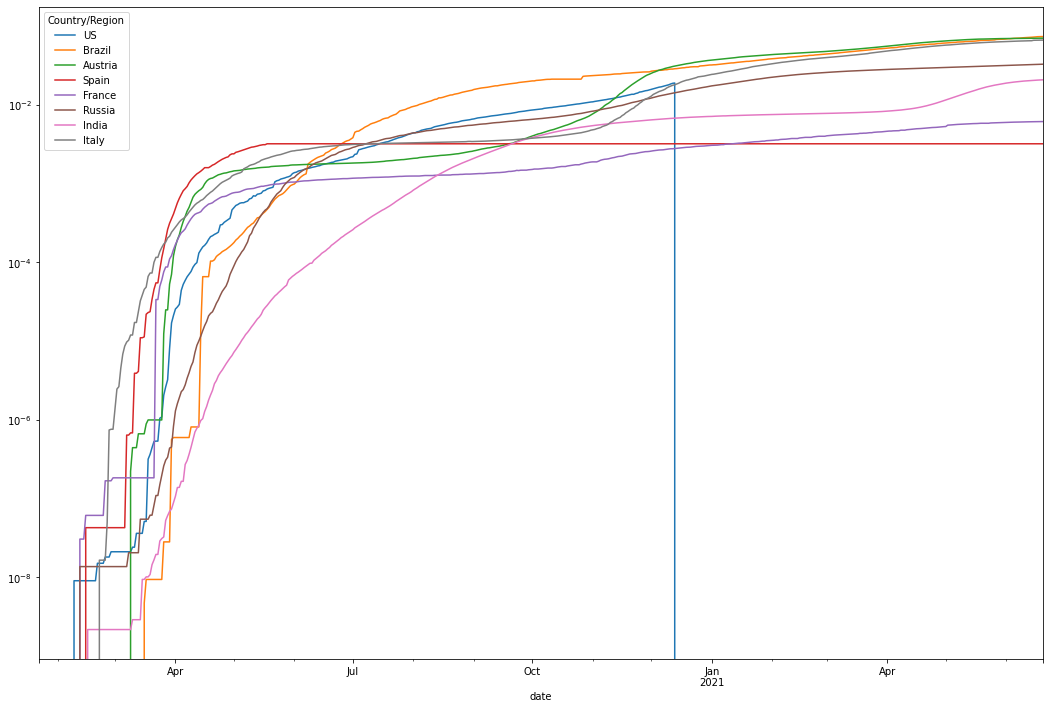

In [34]:
df_recovered[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

### Deaths / cases ratio

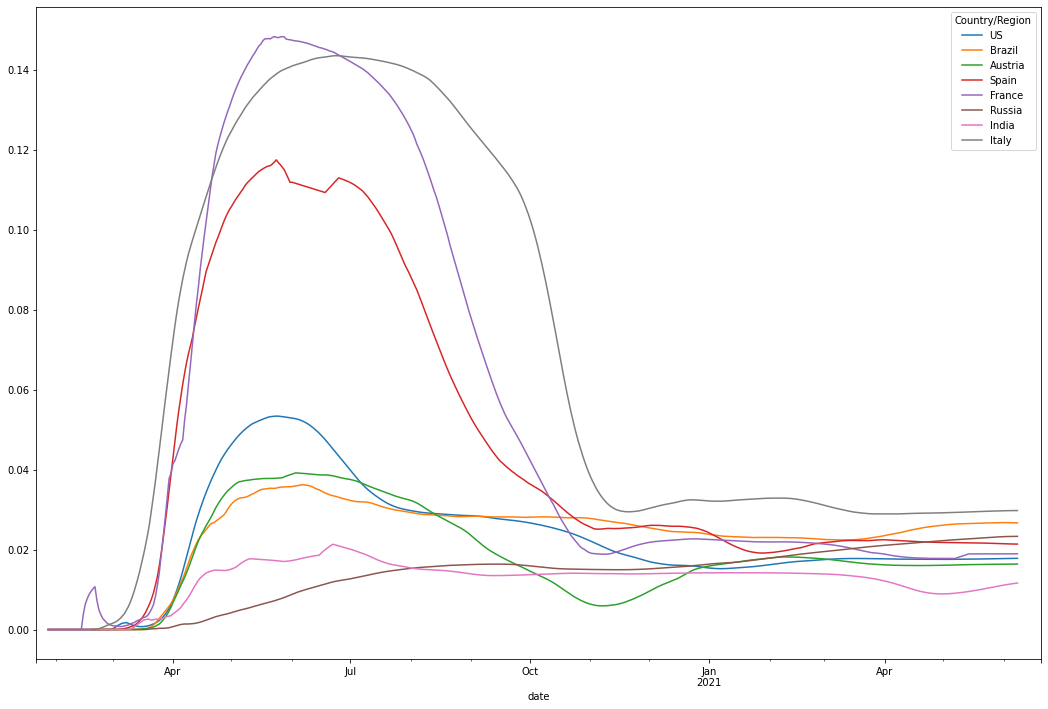

In [35]:
ratio = df_deaths/df_cases.shift(-12)
ratio[countries_observed].rolling(window=7).mean().plot(figsize=(18,12))
plt.show()